In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Facebook_Marketplace_data.csv')
# Data Overview
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Information:")
df.info()

# Handle missing values
# Assuming missing values are to be filled with 0 or dropped
df.fillna(0, inplace=True)

# Convert status_published to datetime
df['status_published'] = pd.to_datetime(df['status_published'])
df['hour_published'] = df['status_published'].dt.hour
df['day_of_week'] = df['status_published'].dt.day_name()

First 5 rows of the dataset:
   status_id status_type status_published  num_reactions  num_comments  \
0          1       video   4/22/2018 6:00            529           512   
1          2       photo  4/21/2018 22:45            150             0   
2          3       video   4/21/2018 6:17            227           236   
3          4       photo   4/21/2018 2:29            111             0   
4          5       photo   4/18/2018 3:22            213             0   

   num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  \
0         262        432         92         3          1         1   
1           0        150          0         0          0         0   
2          57        204         21         1          1         0   
3           0        111          0         0          0         0   
4           0        204          9         0          0         0   

   num_angrys  Column1  Column2  Column3  Column4  
0           0      NaN      NaN      NaN      NaN  
1

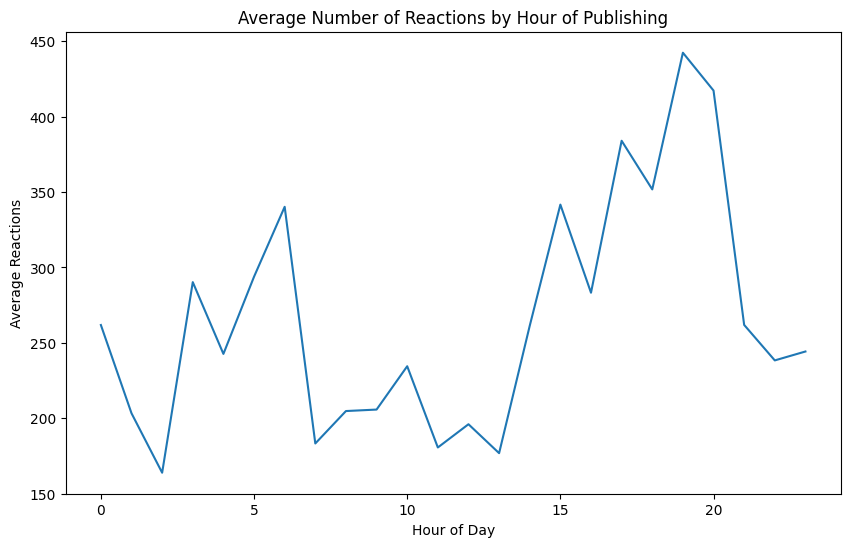

In [8]:
# Question 1: Effect of Time on Reactions
# Group data by hour and analyze the average reactions
time_analysis = df.groupby('hour_published')['num_reactions'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour_published', y='num_reactions', data=time_analysis)
plt.title('Average Number of Reactions by Hour of Publishing')
plt.xlabel('Hour of Day')
plt.ylabel('Average Reactions')
plt.show()

Correlation Matrix:
               num_reactions  num_comments  num_shares
num_reactions       1.000000      0.150843    0.250723
num_comments        0.150843      1.000000    0.640637
num_shares          0.250723      0.640637    1.000000


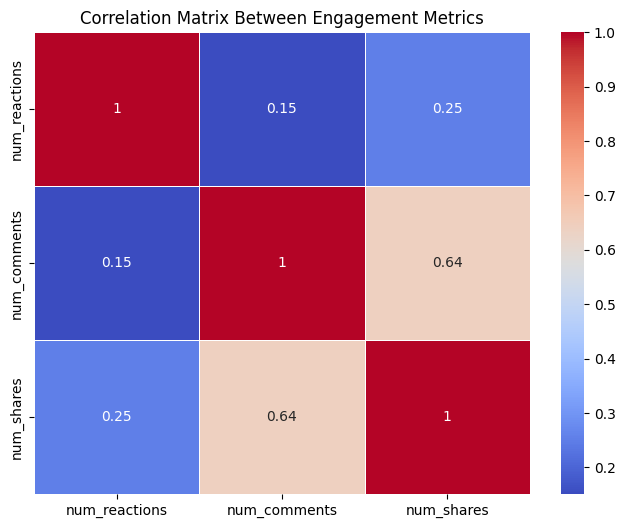

In [9]:
# Question 2: Correlation Analysis
corr_matrix = df[['num_reactions', 'num_comments', 'num_shares']].corr()
print("Correlation Matrix:")
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Between Engagement Metrics')
plt.show()

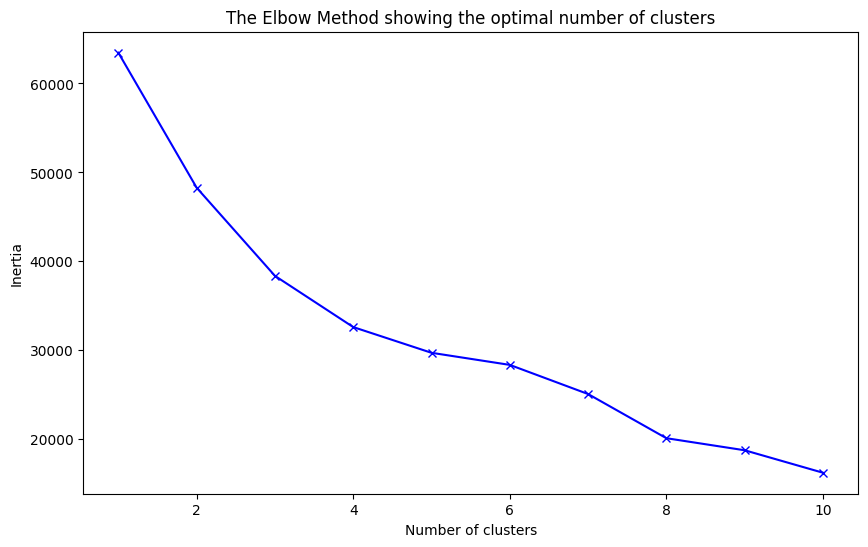

In [10]:
# Question 3: K-Means Clustering
# Selecting columns for clustering
cluster_columns = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
# Encoding categorical data
df = pd.get_dummies(df, columns=['status_type'], drop_first=True)
# Standardizing data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[cluster_columns])

# Finding the optimum number of clusters using the elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal number of clusters')
plt.show()

In [14]:
# Question 4: Training K-Means with optimal clusters (e.g., assuming 4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

# Summary of Clusters
print("Cluster Summary:")
print(df.groupby('cluster').mean(numeric_only=True))

Cluster Summary:
           status_id  num_reactions  num_comments  num_shares    num_likes  \
cluster                                                                      
0        3523.942381     110.854603     80.411429   17.806032   103.509206   
1        5190.940510     579.518414   2861.226629  409.413598   450.339943   
2        1894.358491    1825.617251     61.474394   11.676550  1819.824798   
3        4566.500000    1618.000000   1626.846154  812.538462  1146.961538   

          num_loves    num_wows  num_hahas  num_sads  num_angrys  Column1  \
cluster                                                                     
0          6.355873    0.533333   0.292381  0.120635    0.040794      0.0   
1        113.739377    4.492918   6.977337  2.566572    1.390935      0.0   
2          3.113208    2.442049   0.199461  0.032345    0.005391      0.0   
3        322.692308  124.538462  20.423077  1.538462    1.846154      0.0   

         Column2  Column3  Column4  hour_published 

Count of Different Post Types:
status_type_photo     4288
status_type_status     365
status_type_video     2334
dtype: int64


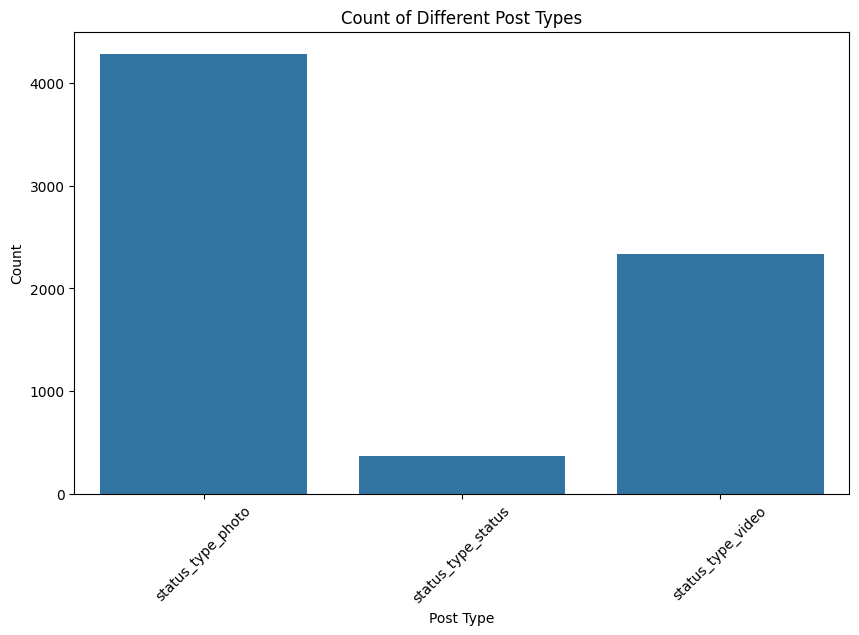

In [18]:
# Question 5: Count of Different Types of Posts
if any(col.startswith('status_type_') for col in df.columns):
    status_type_columns = [col for col in df.columns if col.startswith('status_type_')]
    post_count = df[status_type_columns].sum()
    print("Count of Different Post Types:")
    print(post_count)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=post_count.index, y=post_count.values)
    plt.title('Count of Different Post Types')
    plt.xlabel('Post Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

Average Engagement Metrics for Each Post Type:
          status_type  num_reactions  num_comments  num_shares
0   status_type_photo     181.290345     15.993470    2.553871
1  status_type_status     438.783562     36.238356    2.558904
2   status_type_video     283.409597    642.478149  115.679949


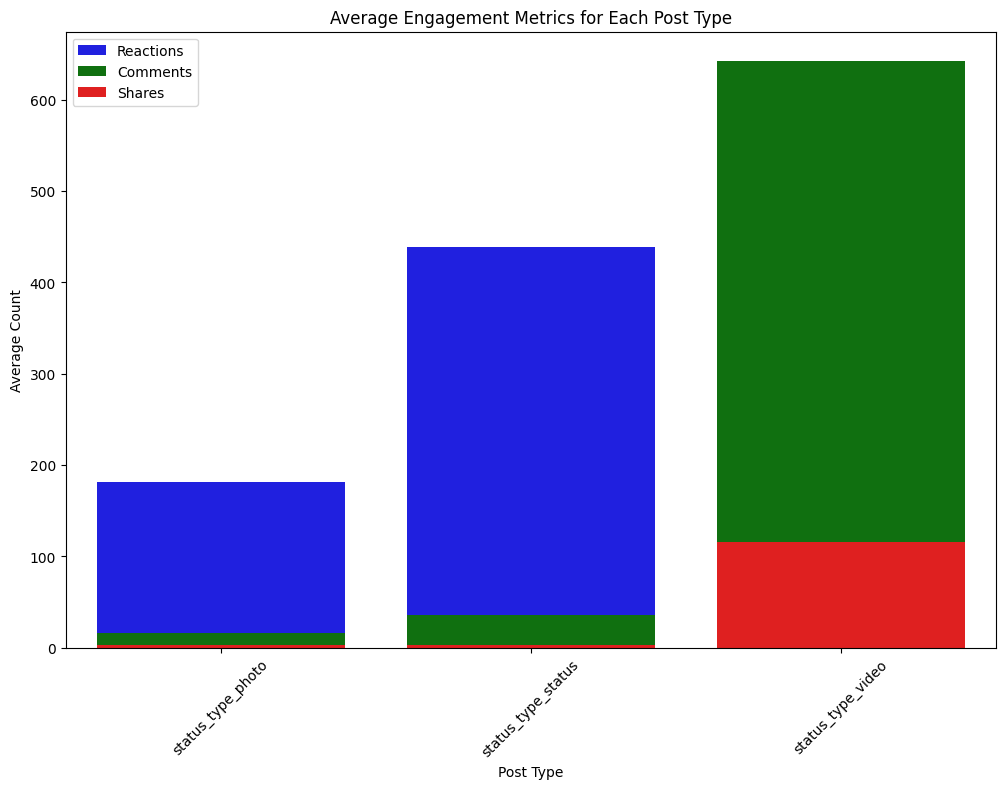

In [20]:
 #Question 6: Average Value of Engagement Metrics for Each Post Type
if any(col.startswith('status_type_') for col in df.columns):
    status_type_columns = [col for col in df.columns if col.startswith('status_type_')]
    avg_metrics = []
    for col in status_type_columns:
        avg_metrics.append({
            'status_type': col,
            'num_reactions': df[df[col] == 1]['num_reactions'].mean(),
            'num_comments': df[df[col] == 1]['num_comments'].mean(),
            'num_shares': df[df[col] == 1]['num_shares'].mean()
        })
    avg_metrics_df = pd.DataFrame(avg_metrics)
    print("Average Engagement Metrics for Each Post Type:")
    print(avg_metrics_df)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='status_type', y='num_reactions', data=avg_metrics_df, color='b', label='Reactions')
    sns.barplot(x='status_type', y='num_comments', data=avg_metrics_df, color='g', label='Comments')
    sns.barplot(x='status_type', y='num_shares', data=avg_metrics_df, color='r', label='Shares')
    plt.title('Average Engagement Metrics for Each Post Type')
    plt.xlabel('Post Type')
    plt.ylabel('Average Count')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()